<a href="https://colab.research.google.com/github/AyushiDubey22/Credit-card-/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142681,84874,-1.175585,-0.435225,1.228103,0.052441,1.503111,-2.004394,-0.122498,-0.046657,-0.325656,-0.737693,-0.248959,0.374192,0.659573,-0.481487,0.398917,0.607520,-0.291507,-0.241109,-0.803713,0.253387,-0.066904,-0.643857,0.314354,0.337604,-0.403670,-0.122969,-0.016914,0.101735,1.98,0.0
142682,84874,1.241407,-0.414978,-0.880402,-1.049339,1.638588,3.350938,-0.809687,0.865613,0.244406,-0.125626,0.001660,0.068067,0.144828,0.226788,1.465254,0.866771,-0.918352,0.022088,0.320105,0.146033,-0.223144,-0.895358,0.084569,1.038418,0.155673,0.799608,-0.067291,0.014978,44.62,0.0
142683,84875,-1.329905,0.864110,0.177223,-0.902612,1.291457,4.002512,-1.207749,1.972494,-0.153283,-1.029538,-0.963872,0.228398,0.026172,0.245909,0.124880,0.591823,-0.303044,0.466119,0.542887,-0.126622,0.038467,-0.217288,-0.119543,1.036008,0.056579,0.301629,-0.283690,-0.036675,11.50,0.0
142684,84876,-0.636351,1.257445,1.521837,-0.027459,0.006568,-1.158053,1.058088,-0.476554,0.360277,0.548543,0.193878,-0.488394,-0.659606,-0.835071,1.035537,0.113001,-0.060295,-0.251579,-0.261086,0.447627,-0.417344,-0.675847,-0.031819,0.635950,-0.178399,0.006644,0.133808,-0.227752,7.96,0.0
142685,84876,0.961973,-0.860360,-0.430272,-1.837038,-0.580153,-0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(142686, 31)

In [ ]:
print('Number of rows:{}'.format(df.shape[0]))
print('Number of columns:{}'.format(df.shape[1]))

Number of rows:142686
Number of columns:31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142686 entries, 0 to 142685
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142686 non-null  int64  
 1   V1      142686 non-null  float64
 2   V2      142686 non-null  float64
 3   V3      142686 non-null  float64
 4   V4      142686 non-null  float64
 5   V5      142686 non-null  float64
 6   V6      142686 non-null  float64
 7   V7      142685 non-null  float64
 8   V8      142685 non-null  float64
 9   V9      142685 non-null  float64
 10  V10     142685 non-null  float64
 11  V11     142685 non-null  float64
 12  V12     142685 non-null  float64
 13  V13     142685 non-null  float64
 14  V14     142685 non-null  float64
 15  V15     142685 non-null  float64
 16  V16     142685 non-null  float64
 17  V17     142685 non-null  float64
 18  V18     142685 non-null  float64
 19  V19     142685 non-null  float64
 20  V20     142685 non-null  float64
 21  V21     14

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142686.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000,142685.000000
mean,52467.147316,-0.249866,0.021475,0.673591,0.137175,-0.282893,0.078072,-0.118122,0.065105,-0.089127,-0.022768,0.208382,0.030940,-0.018766,0.028413,0.229201,-0.008491,0.041905,-0.083812,-0.017128,0.042349,-0.039818,-0.118039,-0.033193,0.011335,0.130821,0.021535,0.000636,0.002207,90.656745,0.001899
std,21132.772484,1.814390,1.610366,1.266182,1.322208,1.304916,1.282313,1.165277,1.233326,1.090355,1.053220,1.048352,1.018780,0.997775,0.918238,0.925329,0.877360,0.885128,0.832183,0.808521,0.719355,0.720754,0.634547,0.589482,0.595664,0.437342,0.492358,0.389189,0.306297,246.361798,0.043540
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38220.000000,-1.021370,-0.559620,0.171460,-0.718073,-0.903666,-0.661817,-0.604765,-0.130507,-0.713023,-0.495894,-0.550015,-0.371099,-0.673527,-0.343542,-0.307235,-0.474992,-0.411813,-0.548735,-0.505628,-0.169678,-0.225821,-0.547348,-0.171807,-0.325702,-0.136000,-0.327190,-0.060116,-0.004211,5.990000,0.000000
50%,54262.000000,-0.272512,0.106478,0.750705,0.164362,-0.315029,-0.177563,-0.064558,0.081087,-0.153461,-0.100438,0.121322,0.168893,-0.020292,0.059256,0.340130,0.069720,-0.023741,-0.083011,-0.017037,-0.026762,-0.059558,-0.094326,-0.045124,0.068363,0.167387,-0.066478,0.012121,0.023614,23.510000,0.000000
75%,70239.000000,1.158444,0.778168,1.363604,0.991310,0.236679,0.462727,0.409170,0.375483,0.487043,0.418901,1.029243,0.654173,0.641757,0.452515,0.897133,0.531139,0.427672,0.388080,0.479457,0.164346,0.113044,0.300427,0.083109,0.408281,0.420155,0.284409,0.087763,0.076986,80.050000,0.000000
max,84876.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df_cleaned.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
sc= StandardScaler()
df_cleaned['Amount'] = sc.fit_transform(pd.DataFrame(df_cleaned['Amount']))
df_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239337,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357065,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.169030,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.133314,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083888,0.0


Checking the distribution of the classes

In [ ]:
classes = df_cleaned['Class'].value_counts()
classes

Class
0.0    142414
1.0       271
Name: count, dtype: int64

In [ ]:
normal_share = round((classes[0]/df_cleaned['Class'].count()*100),2)
normal_share

99.81

In [ ]:
fraud_share = round((classes[1]/df_cleaned['Class'].count()*100),2)
fraud_share

0.19

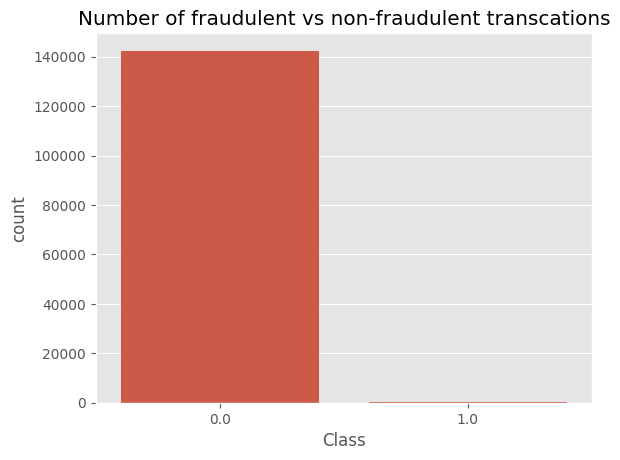

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df_cleaned)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

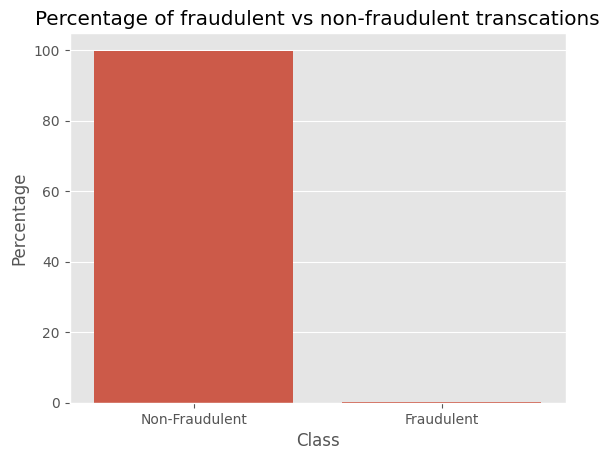

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [ ]:
# Creating fraudulent dataframe
data_fraud = df_cleaned[df_cleaned['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df_cleaned[df_cleaned['Class'] == 0]

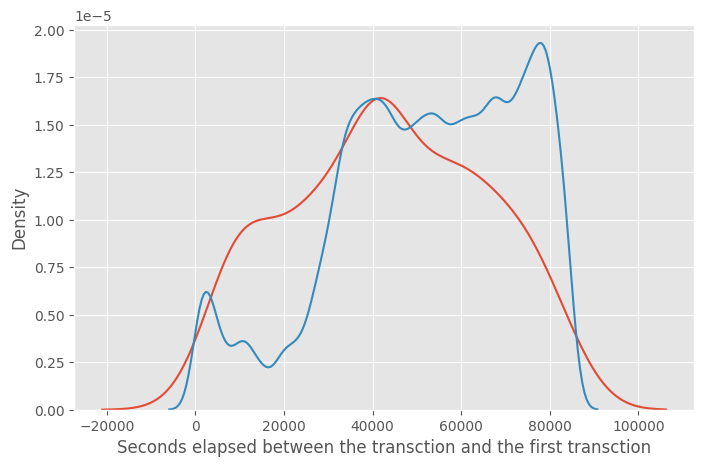

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()



We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [ ]:
df_cleaned.drop('Time', axis=1, inplace=True)

In [ ]:
df_cleaned.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.239337,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357065,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.169030,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.133314,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083888,0.0


In [ ]:
df_cleaned.duplicated().any()

True

In [ ]:
data=df_cleaned.drop_duplicates()

In [ ]:
data.shape

(138222, 30)

In [ ]:
data['Class'].value_counts()

Class
0.0    137958
1.0       264
Name: count, dtype: int64

In [ ]:
plt.style.use('ggplot')

In [ ]:
x=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier ={"logistic Regression": LogisticRegression(),"Decision tree Classifier":DecisionTreeClassifier()}


In [ ]:
for name, clf in classifier.items():
     print(f"\n======={name}========")
     clf.fit(x_train, y_train)
     y_pred = clf.predict(x_test)
     print(f'\n Accuracy:  {accuracy_score(y_test, y_pred)}')
     print(f"\n Precision: {precision_score(y_test,y_pred)}" )
     print(f"\n Recall: {recall_score(y_test,y_pred)}")
     print(f"\n F1 score: {f1_score(y_test,y_pred)}")


=======logistic Regression========

 Accuracy:  0.9987701211792368

 Precision: 0.71875

 Recall: 0.4791666666666667

 F1 score: 0.575

=======Decision tree Classifier========

 Accuracy:  0.9993127147766323

 Precision: 0.8536585365853658

 Recall: 0.7291666666666666

 F1 score: 0.7865168539325843


In [ ]:
#Sampaling of imbalance data
normal = data[data["Class"]==0]
fraud= data[data["Class"]==1]

In [ ]:
normal.shape

(137958, 30)

In [ ]:
fraud.shape

(264, 30)

In [ ]:
normal_sample = normal.sample(n=264)

In [ ]:
normal_sample.shape

(264, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.242430,-0.485237,0.653367,-1.182214,-1.131623,-0.909065,-0.417575,-0.164309,1.779668,-1.232582,-0.345579,1.379213,1.038256,-0.464580,0.647780,-0.810846,0.080726,-0.147029,0.859785,0.011967,0.100577,0.636340,-0.180134,0.516198,0.655756,0.151250,0.040433,0.022713,-0.275396,0.0
1,1.339141,-1.066840,-0.651401,-1.770110,0.976436,3.548077,-1.537409,0.917804,-0.548854,0.644143,-0.076234,-0.759082,0.364090,-0.314675,1.298184,1.807228,-0.447367,-0.410183,0.579689,0.316121,0.357723,0.734764,-0.180473,1.051640,0.572356,-0.039369,0.031578,0.027475,-0.128497,0.0
2,1.335698,0.336310,-0.276954,0.365946,0.364423,-0.251242,0.118965,-0.157466,0.018886,-0.306393,-1.196125,0.153957,1.188573,-0.511599,1.119089,0.854607,-0.554827,0.071874,0.321173,0.031243,-0.365245,-1.034526,-0.061298,-1.036892,0.423408,0.177748,-0.022158,0.019938,-0.319315,0.0
3,1.236356,0.316577,0.195462,0.497558,-0.126584,-0.553109,-0.002164,-0.053158,-0.251119,-0.122422,1.391173,0.978287,0.505262,-0.171560,0.383898,0.756349,-0.392886,0.265743,0.212728,-0.039004,-0.253850,-0.752918,0.072474,-0.028529,0.240102,0.096265,-0.025354,0.018008,-0.359946,0.0
4,1.160741,-0.166182,0.365195,0.819750,-0.336319,-0.140193,-0.217122,-0.084231,2.039091,-0.592800,-0.619484,-2.847526,0.728546,1.484322,-0.682560,0.093756,0.499519,-0.060564,0.353479,-0.060511,-0.480466,-1.167438,-0.055693,-0.506549,0.343462,0.295912,-0.070585,0.009924,-0.071751,0.0


In [ ]:
new_data["Class"].value_counts()

Class
0.0    264
1.0    264
Name: count, dtype: int64

In [ ]:
x=new_data.drop('Class',axis=1)
y=new_data['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
classifier = {"logistic Regression": LogisticRegression(),"Decision tree Classifier":DecisionTreeClassifier()}
for name, clf in classifier.items():
     print(f"\n======={name}========")
     clf.fit(x_train, y_train)
     y_pred = clf.predict(x_test)
     print(f'\n Accuracy:  {accuracy_score(y_test, y_pred)}')
     print(f"\n Precision: {precision_score(y_test,y_pred)}" )
     print(f"\n Recall: {recall_score(y_test,y_pred)}")
     print(f"\n F1 score: {f1_score(y_test,y_pred)}")


=======logistic Regression========

 Accuracy:  0.9433962264150944

 Precision: 0.9782608695652174

 Recall: 0.9

 F1 score: 0.9375

=======Decision tree Classifier========

 Accuracy:  0.8867924528301887

 Precision: 0.8653846153846154

 Recall: 0.9

 F1 score: 0.8823529411764707


In [ ]:
#over sampling imbalance data
x=data.drop('Class',axis=1)
y=data['Class']
x.shape

(138222, 29)

In [ ]:
y.shape

(138222,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

Class
0.0    137958
1.0    137958
Name: count, dtype: int64

In [ ]:
classifier = {"logistic Regression": LogisticRegression(),"Decision tree Classifier":DecisionTreeClassifier()}
for name, clf in classifier.items():
     print(f"\n======={name}========")
     clf.fit(x_train, y_train)
     y_pred = clf.predict(x_test)
     print(f"\n Accuracy:  {accuracy_score(y_test, y_pred)}")
     print(f"\n Precision score: {precision_score(y_test,y_pred)}")
     print(f"\n Recall score: {recall_score(y_test,y_pred)}")
     print(f"\n F1 score: {f1_score(y_test,y_pred)}")


=======logistic Regression========

 Accuracy:  0.9433962264150944

 Precision score: 0.9782608695652174

 Recall score: 0.9

 F1 score: 0.9375

=======Decision tree Classifier========

 Accuracy:  0.9056603773584906

 Precision score: 0.8846153846153846

 Recall score: 0.92

 F1 score: 0.9019607843137256


In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_res,y_res)

DecisionTreeClassifier()

In [ ]:
import joblib
joblib.dump(dtc,'credit_card_model.pkl')

['credit_card_model.pkl']

In [ ]:
model = joblib.load("credit_card_model.pkl")

In [ ]:
pred= model.predict([[-1.359807,	-0.072781,	2.536347, 1.378155,	-0.338321,	0.462388,	0.239599,	0.098698,	0.363787,	0.090794, -0.551600,	-0.617801,	-0.991390,	-0.311169,	1.468177,	-0.470401	,0.207971,	0.025791,	0.403993,	0.251412,	-0.018307,	0.277838,	-0.110474,	0.066928,	0.128539,	-0.189115,	0.133558,	-0.021053,	0.239337	]])

In [ ]:
pred[0]

0.0

In [ ]:
if pred[0]==0:
    print("Non-fraudulent")
else:
    print("Fraudulent")

Non-fraudulent
